In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
# Generating data
X = -2 * np.random.rand(100, 2)
X1 = 1 + 2 * np.random.rand(50, 2)
X[50:100, :] = X1

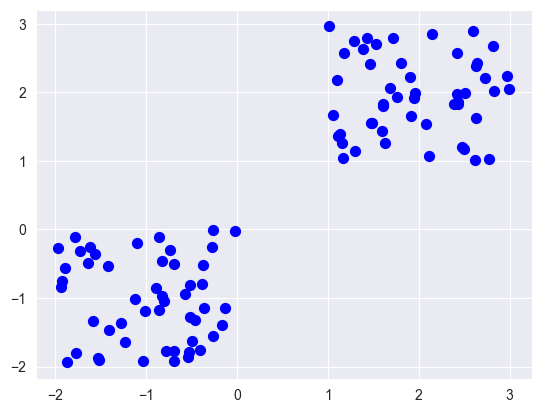

In [3]:
# Visualizing data
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')
plt.show()

In [4]:
# DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=10)  # You need to tune these parameters according to your data
db.fit(X)

DBSCAN(eps=0.3, min_samples=10)

In [5]:
# Getting cluster labels and core sample indices
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [8]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plotting the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

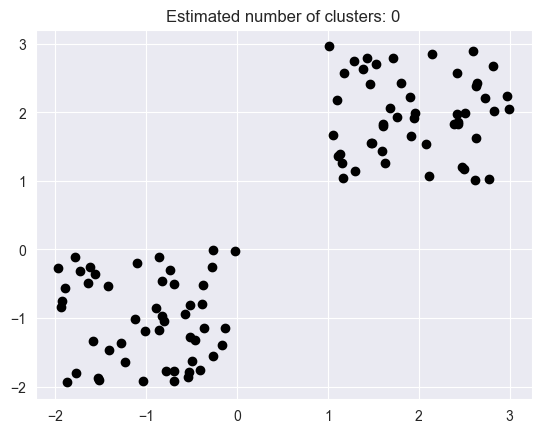

In [9]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
